In [1]:
!pip3 install rdkit

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

In [46]:
train = pd.read_csv('data/train.csv', sep=',')
print(train)

                                                SMILES  activity
0                                                OCC=C       5.0
1       CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1      94.0
2                      COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1       5.4
3                                      CCCCC(CC)C(O)=O      -8.2
4    COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...      26.2
..                                                 ...       ...
754                               CC1=CC2=CC=CN=C2C=C1      43.1
755  C12CC[C@@](O)(C#C)[C@@]1(C)CCC3C4CCC(=O)C=C4CCC23      15.8
756                          CCCCNS(=O)(=O)C1=CC=CC=C1      17.8
757                     NC1=C(Cl)C(Cl)=NC(C(O)=O)=C1Cl      55.1
758  CCOC1=CC(OC2=CC=C(C=C2Cl)C(F)(F)F)=CC=C1[N+]([...      59.8

[759 rows x 2 columns]


In [21]:
display(train.head())

,SMILES,activity
0,OCC=C,5.0
1,CO/N=C(/C(=O)OC)\C1=C(COC2=C(C)C=CC=C2)C=CC=C1,94.0
2,COC(=O)NS(=O)(=O)C1=CC=C(N)C=C1,5.4
3,CCCCC(CC)C(O)=O,-8.2
4,COC(=O)C1=C(CC(C)C)C(C2=NCCS2)=C(N=C1C(F)F)C(F...,26.2


In [22]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


None

In [23]:
from os.path import join 
from sklearn.neighbors import (KNeighborsRegressor, KNeighborsClassifier) 
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, accuracy_score) 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, LabelEncoder)  
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from PIL import Image

In [26]:
le = LabelEncoder()
train['SMILES'] = le.fit_transform(train['SMILES'])
train.head()

,SMILES,activity
0,671,5.0
1,408,94.0
2,422,5.4
3,230,-8.2
4,412,26.2


In [27]:
! pip install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [28]:
! pip install matplotlib
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


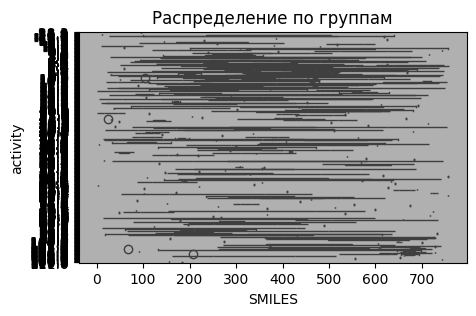

In [29]:
# Показать с помощью графика "ящик с усами" распределение по группам
fig = plt.figure(figsize=(5, 3))
boxplot = sns.boxplot(
    data=train,
    y='activity',
    x='SMILES',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по группам');
boxplot.set_xlabel('SMILES');
boxplot.set_ylabel('activity');
boxplot.grid()
# Как видно из графика, 

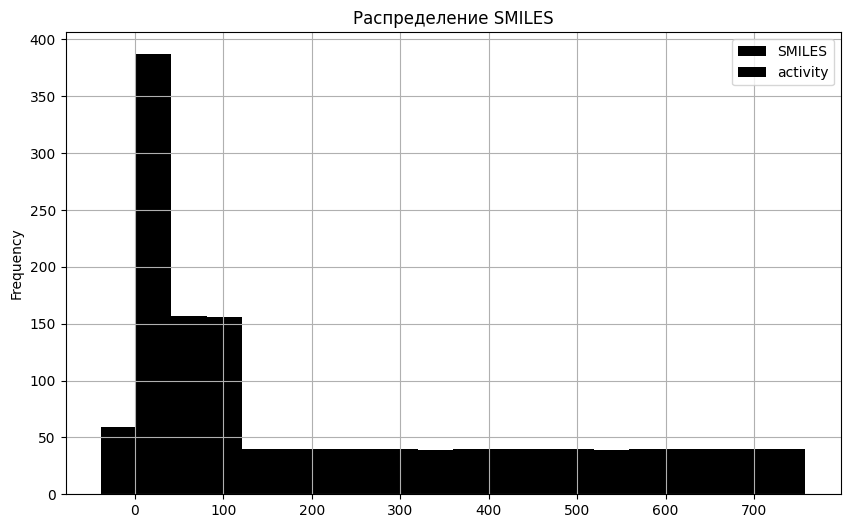

In [30]:
train.plot(
        kind='hist',
        figsize=(10, 6),
        title='Распределение SMILES',
        grid = True,
        color = 'black',
        bins=20
    );

In [31]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [37]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objects as go

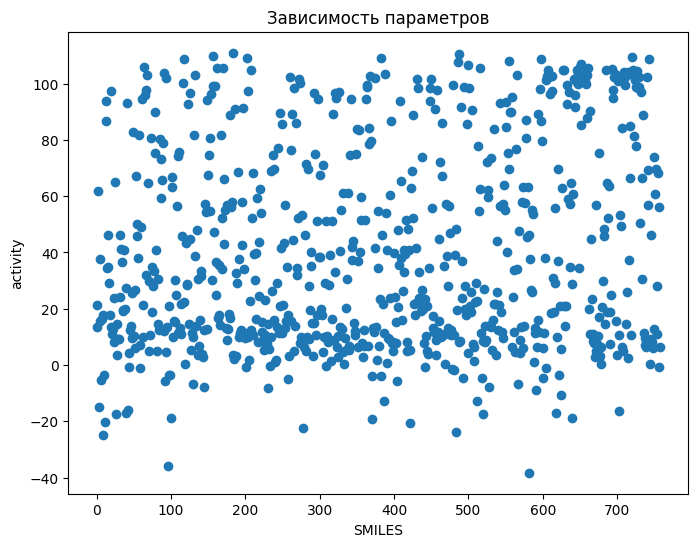

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(train['SMILES'], train['activity'])
plt.xlabel('SMILES')
plt.ylabel('activity')
plt.title('Зависимость параметров')
plt.show()

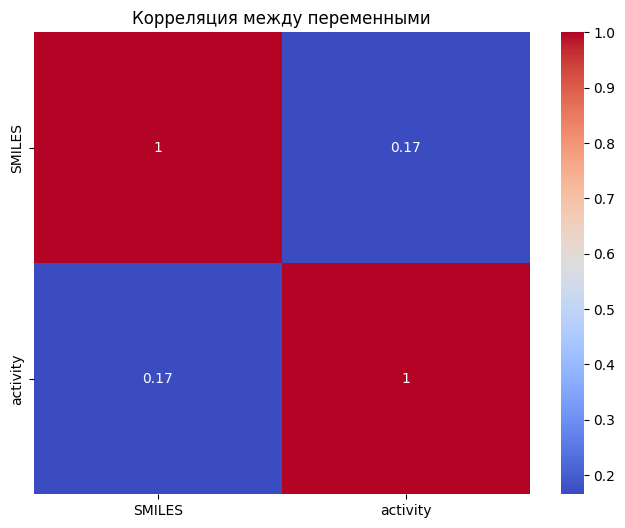

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между переменными')
plt.show()

In [47]:
data = train.copy()

In [50]:
X = data['SMILES']
y = data['activity'] 

In [44]:
x_train, y_train = train_test_split(x, y, random_state = 101)

NameError: name 'x' is not defined